# Lab Session- 04

# Rohit Praveen Nair

# A1

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score


def load_dataset(file_path):
    try:
        df = pd.read_csv(file_path)
        return df
    except Exception as e:
        raise ValueError(f"Error loading dataset: {e}")

# Split data
def split_data(df, target_column, test_size=0.2, random_state=42):
    if target_column not in df.columns:
        raise ValueError(f"Error: Target column '{target_column}' not found in dataset.")
    
    X = df.drop(columns=[target_column])
    y = df[target_column]
    
    if not pd.api.types.is_categorical_dtype(y):
        y = pd.Categorical(y).codes  # Convert to numeric category codes
    
    return train_test_split(X, y, test_size=test_size, random_state=random_state)

# Train model
def train_model(X_train, y_train):
    model = RandomForestClassifier(random_state=42, class_weight="balanced")
    model.fit(X_train, y_train)
    return model


def evaluate_model(model, X, y, dataset_type="Train"):
    y_pred = model.predict(X)
    conf_matrix = confusion_matrix(y, y_pred)
    report = classification_report(y, y_pred, output_dict=True)
    
    print(f"\n{dataset_type} Confusion Matrix:")
    print(conf_matrix)
    
    print(f"\n{dataset_type} Classification Report:")
    print(classification_report(y, y_pred))
    
    return report["weighted avg"]["precision"], report["weighted avg"]["recall"], report["weighted avg"]["f1-score"]

# Infer model fit
def infer_model_fit(train_f1, test_f1):
    if train_f1 > test_f1 + 0.1:
        return "Overfitting"
    elif test_f1 > train_f1 + 0.1:
        return "Underfitting"
    else:
        return "Well-fitted"

file_path = "iris.csv"
df = load_dataset(file_path)
print("Dataset loaded successfully. Shape:", df.shape)

target_column = "species"

if target_column in df.columns:
    X_train, X_test, y_train, y_test = split_data(df, target_column)
    print(f"Data split: Train {X_train.shape}, Test {X_test.shape}")

    model = train_model(X_train, y_train)
    print("Model training completed.")

    train_precision, train_recall, train_f1 = evaluate_model(model, X_train, y_train, "Train")
    test_precision, test_recall, test_f1 = evaluate_model(model, X_test, y_test, "Test")

    fit_status = infer_model_fit(train_f1, test_f1)
    print("\nModel Fit Status:", fit_status)

else:
    print(f"Error: Target column '{target_column}' not found in dataset.")


Dataset loaded successfully. Shape: (150, 5)
Data split: Train (120, 4), Test (30, 4)
Model training completed.


C:\Users\rohit\AppData\Local\Temp\ipykernel_14164\3809929181.py:25: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if not pd.api.types.is_categorical_dtype(y):



Train Confusion Matrix:
[[40  0  0]
 [ 0 41  0]
 [ 0  0 39]]

Train Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        41
           2       1.00      1.00      1.00        39

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120


Test Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Test Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Model Fit Status: Well-fitted


# A2

In [13]:
# Function to calculate Mean Squared Error (MSE)
def calculate_mse(actual, predicted):
    mse = mean_squared_error(actual, predicted)
    return mse

# Function to calculate Root Mean Squared Error (RMSE)
def calculate_rmse(actual, predicted):
    mse = calculate_mse(actual, predicted)
    rmse = np.sqrt(mse)
    return rmse

# Function to calculate Mean Absolute Percentage Error (MAPE)
def calculate_mape(actual, predicted):
    # Ensure no zero division error
    actual = np.array(actual)
    predicted = np.array(predicted)
    percentage_error = np.abs((actual - predicted) / actual) * 100
    mape = np.mean(percentage_error)
    return mape

# Function to calculate R2 score
def calculate_r2(actual, predicted):
    r2 = r2_score(actual, predicted)
    return r2

file_path =file_path = "Lab Session Data.xlsx"
df = pd.read_excel(file_path, engine='openpyxl')
X = df[['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)']]
y = df['Payment (Rs)']

# Train a linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions using the trained model
predicted_values = model.predict(X)

# Calculate evaluation metrics
mse = calculate_mse(y, predicted_values)
rmse = calculate_rmse(y, predicted_values)
mape = calculate_mape(y, predicted_values)
r2 = calculate_r2(y, predicted_values)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")
print(f"R-squared (R2) score: {r2}")

Mean Squared Error (MSE): 5.048709793414476e-28
Root Mean Squared Error (RMSE): 2.2469334198890888e-14
Mean Absolute Percentage Error (MAPE): 8.051519062322532e-15%
R-squared (R2) score: 1.0


# A3 - A7

Training data generated.


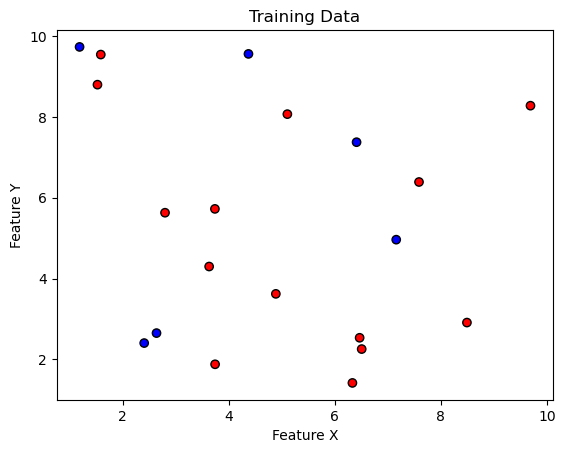

Test data generated.
kNN with k=1 trained and predictions made.


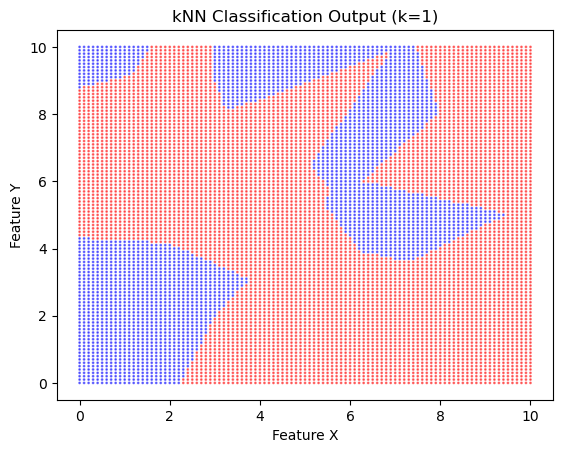

kNN with k=3 trained and predictions made.


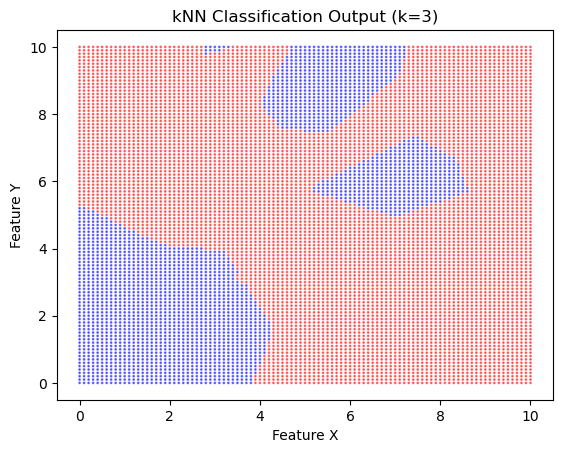

kNN with k=5 trained and predictions made.


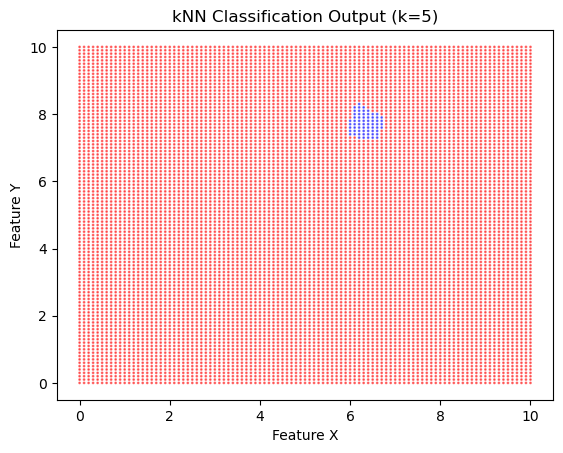

kNN with k=10 trained and predictions made.


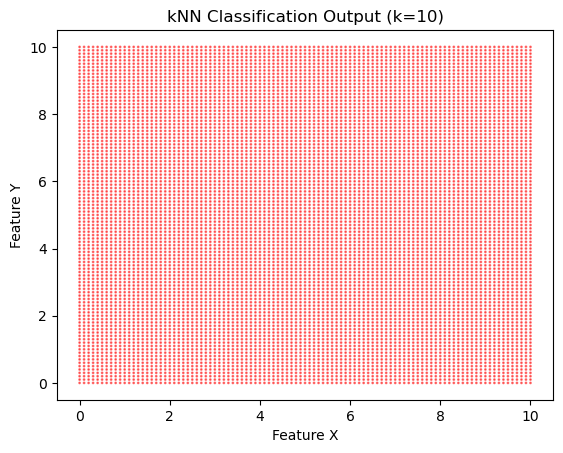

Best k value found: 5 with a score of 0.7


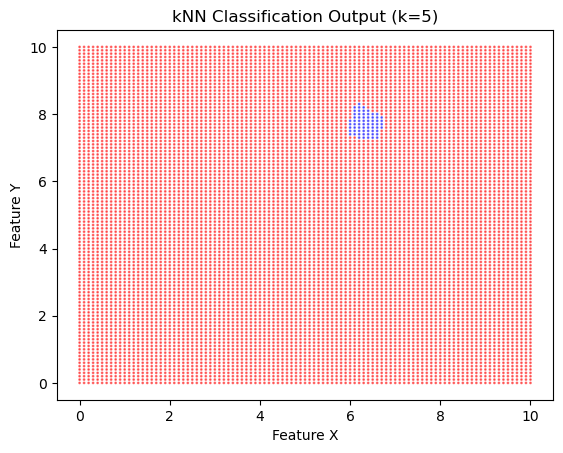

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

def generate_training_data(n=20, seed=42):
    """Generates random training data."""
    np.random.seed(seed)
    X_train = np.random.uniform(1, 10, (n, 2))  # Features X and Y
    y_train = np.random.choice([0, 1], size=n)  # Assign random classes
    return X_train, y_train

def plot_training_data(X_train, y_train):
    """Plots the training data."""
    colors = ['blue' if label == 0 else 'red' for label in y_train]
    plt.scatter(X_train[:, 0], X_train[:, 1], c=colors, edgecolors='black')
    plt.xlabel('Feature X')
    plt.ylabel('Feature Y')
    plt.title('Training Data')
    plt.show()

def generate_test_data():
    """Generates test data using a meshgrid."""
    x_test, y_test = np.meshgrid(np.arange(0, 10.1, 0.1), np.arange(0, 10.1, 0.1))
    X_test = np.c_[x_test.ravel(), y_test.ravel()]
    return X_test

def train_and_predict_knn(X_train, y_train, X_test, k):
    """Trains a kNN classifier and predicts on the test data."""
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    return y_pred

def plot_classification_results(X_test, y_pred, k):
    """Plots the classification results on the test data."""
    colors = ['blue' if label == 0 else 'red' for label in y_pred]
    plt.scatter(X_test[:, 0], X_test[:, 1], c=colors, s=1, alpha=0.5)
    plt.xlabel('Feature X')
    plt.ylabel('Feature Y')
    plt.title(f'kNN Classification Output (k={k})')
    plt.show()

def find_best_k(X_train, y_train, k_values=[1, 3, 5, 10], cv=5):
    """Finds the best k value using GridSearchCV."""
    param_grid = {'n_neighbors': k_values}
    grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=cv)
    grid_search.fit(X_train, y_train)
    return grid_search.best_params_['n_neighbors'], grid_search.best_score_

def main():
    """Main program execution."""
    X_train, y_train = generate_training_data()
    print("Training data generated.")
    plot_training_data(X_train, y_train)

    X_test = generate_test_data()
    print("Test data generated.")

    k_values_to_test = [1, 3, 5, 10]
    for k in k_values_to_test:
        y_pred_k = train_and_predict_knn(X_train, y_train, X_test, k)
        print(f"kNN with k={k} trained and predictions made.")
        plot_classification_results(X_test, y_pred_k, k)

    best_k, best_score = find_best_k(X_train, y_train)
    print(f'Best k value found: {best_k} with a score of {best_score}')

    # plot with the best k
    y_pred_best = train_and_predict_knn(X_train, y_train, X_test, best_k)
    plot_classification_results(X_test, y_pred_best, best_k)

if __name__ == "__main__":
    main()